# 1. Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import numpy as np
from numpy import mean
from numpy import absolute
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# 2. Exploring the Data

In [2]:
weather = pd.read_csv("KC_Weather.csv", index_col="DATE")
weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1973-01-01,0.00,0.0,0.0,30.0,17.0
1973-01-02,0.00,0.0,0.0,42.0,16.0
1973-01-03,0.88,5.0,0.0,35.0,16.0
1973-01-04,0.01,0.0,5.0,16.0,3.0
1973-01-05,0.00,0.0,3.0,10.0,4.0
...,...,...,...,...,...
2023-08-18,0.00,0.0,0.0,83.0,59.0
2023-08-19,0.00,0.0,0.0,98.0,69.0
2023-08-20,0.00,0.0,0.0,95.0,76.0


<AxesSubplot:>

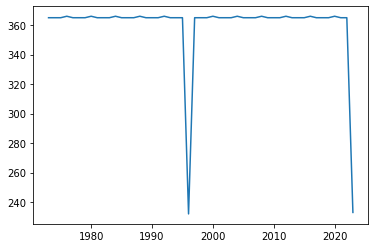

In [3]:
weather.index = pd.to_datetime(weather.index)
Yr=weather.index.year.value_counts().sort_index()
Yr.plot()

In [4]:
weather.describe()

,precip,snow,snow_depth,temp_max,temp_min
count,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
mean,0.106042,0.051860,0.204913,64.672730,44.572082
std,0.341350,0.409518,0.982392,20.895526,19.576973
min,0.000000,0.000000,0.000000,-8.000000,-23.000000
25%,0.000000,0.000000,0.000000,49.000000,30.000000
50%,0.000000,0.000000,0.000000,67.000000,46.000000
75%,0.020000,0.000000,0.000000,82.000000,62.000000
max,8.820000,10.500000,12.000000,109.000000,83.000000


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

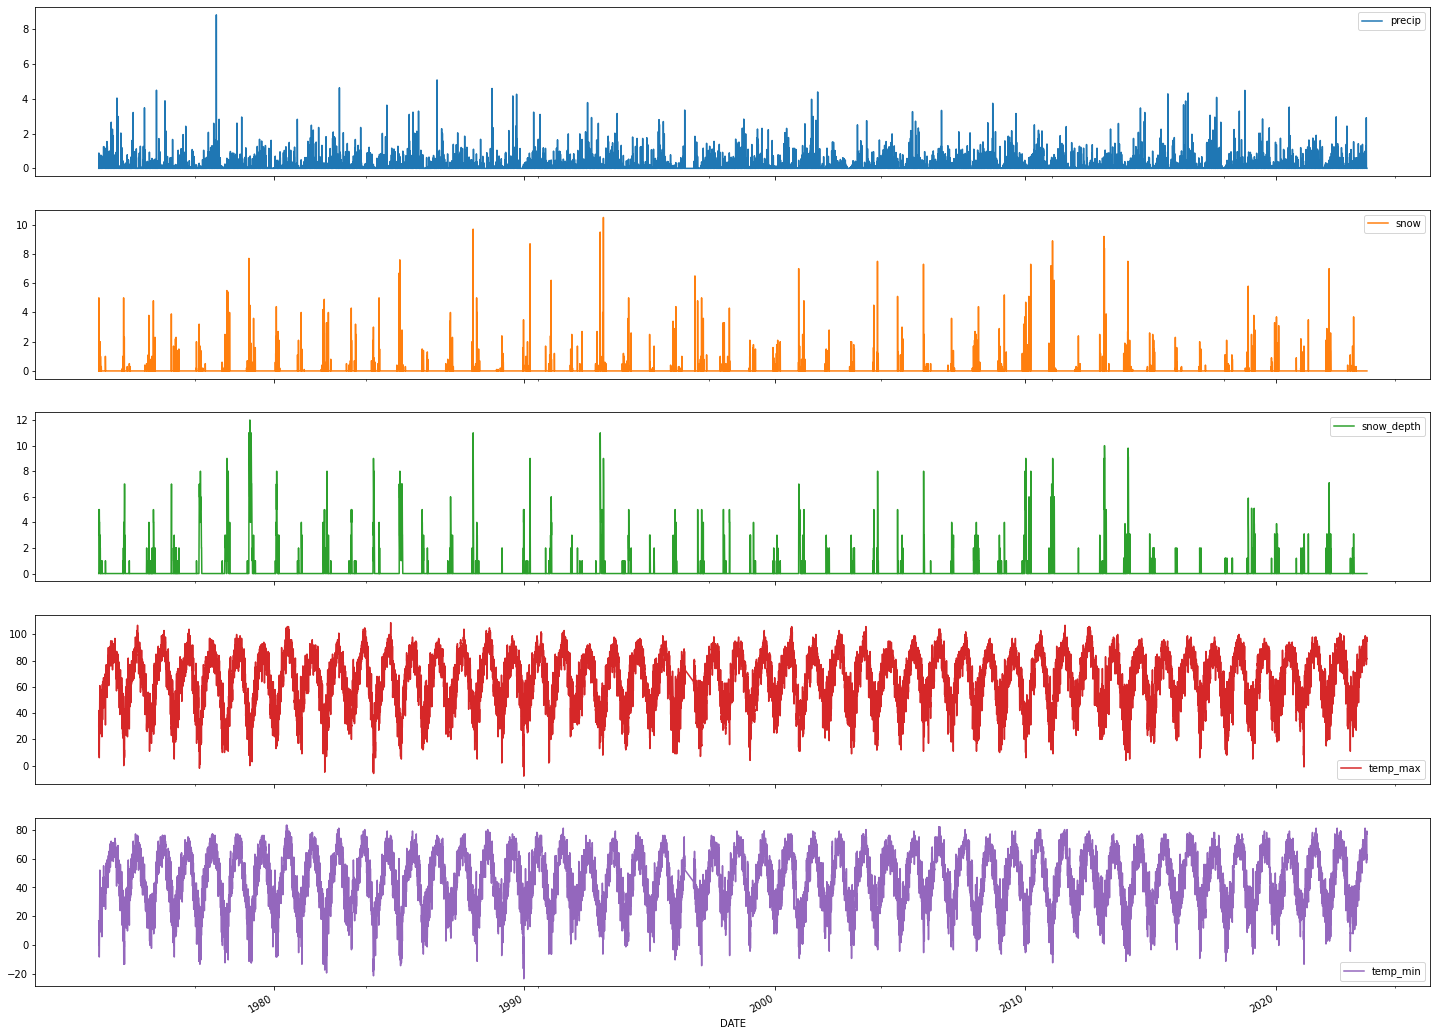

In [5]:
weather.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'snow'}>],
       [<AxesSubplot:title={'center':'snow_depth'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'temp_min'}>, <AxesSubplot:>]],
      dtype=object)

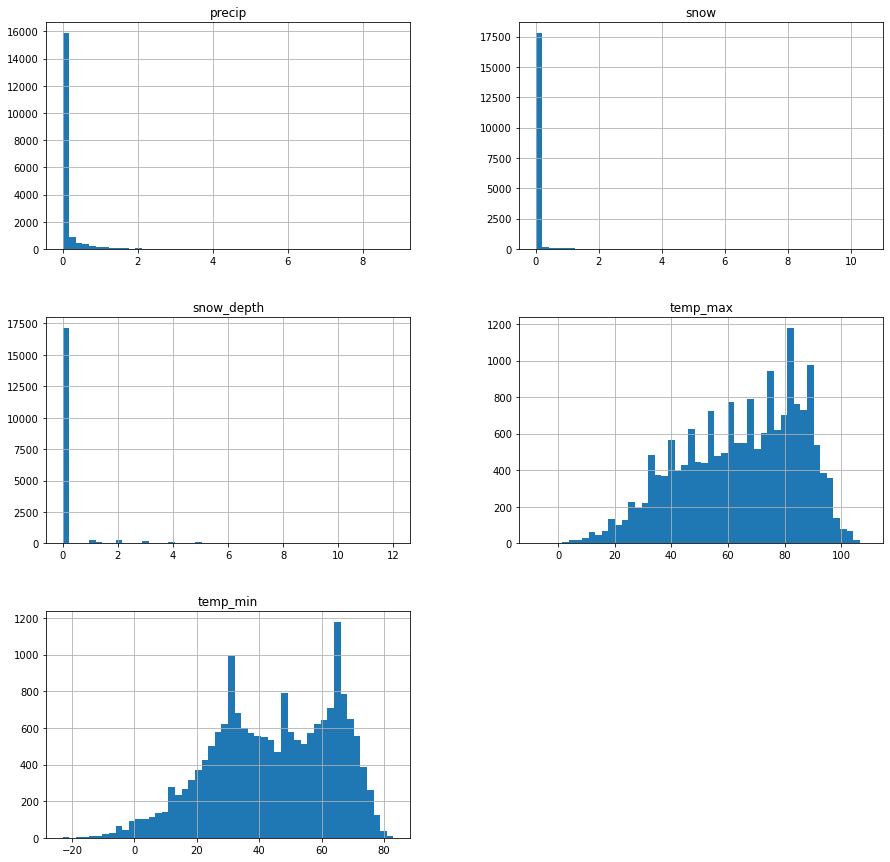

In [6]:
weather.hist(bins=50,figsize=(15,15))

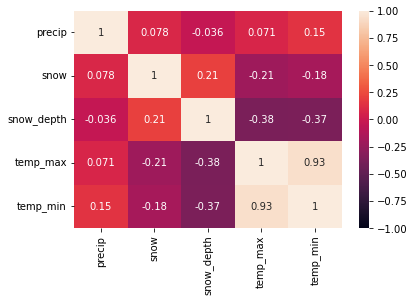

In [7]:
heatmap = sns.heatmap(weather.corr(), vmin=-1, vmax=1, annot=True)

# 3. Setting up data

In [8]:
weather_y=weather.pop("temp_max")
weather_x=weather

In [9]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25)

In [10]:
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)

train_X shape: (13770, 4)
test_X shape: (4591, 4)
train_y shape: (13770,)
test_y shape: (4591,)


In [11]:
kf = KFold(n_splits=10)

# 4. Random Forest Model

In [12]:
score = cross_val_score(RandomForestRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
print(mean(absolute(score)))

Scores for each fold are: [-48.01681916 -48.87008568 -50.69138963 -51.17544138 -47.01463616
 -51.28955571 -51.48867538 -49.0268513  -50.40940393 -48.52951852]
49.65123768610801


In [13]:
regr=RandomForestRegressor()
regr.fit(train_X,train_y)

RandomForestRegressor()

In [14]:
prediction=regr.predict(test_X)
np.mean(np.absolute(prediction-test_y))

5.618430736866102

In [15]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.88


In [16]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 5.62
Residual sum of squares (MSE): 51.90
R2-score: 0.88


# 5. Decision Tree

In [17]:
score2 = cross_val_score(DecisionTreeRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score2}')
print(mean(absolute(score2)))

Scores for each fold are: [-60.76998469 -55.44229456 -59.01201234 -57.95236926 -53.55663965
 -60.29760305 -59.12770292 -57.73669801 -56.01647818 -57.44609179]
57.73578744526359


In [18]:
regressor=DecisionTreeRegressor()
regressor.fit(train_X,train_y)

DecisionTreeRegressor()

In [19]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

5.9080696781813495

In [20]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.87


In [21]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2))

Mean absolute error: 5.91
Residual sum of squares (MSE): 58.73
R2-score: 0.87


# 6. XGBoost 

In [22]:
score = cross_val_score(xgb.XGBRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
print(mean(absolute(score)))

Scores for each fold are: [-45.46178177 -46.87090275 -48.06015788 -49.01616156 -45.48271388
 -48.42181167 -48.5433531  -48.18731573 -48.6188454  -45.23312606]
47.38961697885347


In [23]:
regressor=xgb.XGBRegressor()
regressor.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
prediction3=regressor.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

5.491152628006641

In [25]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.89


In [26]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2))

Mean absolute error: 5.91
Residual sum of squares (MSE): 58.73
R2-score: 0.87


# 7. Results

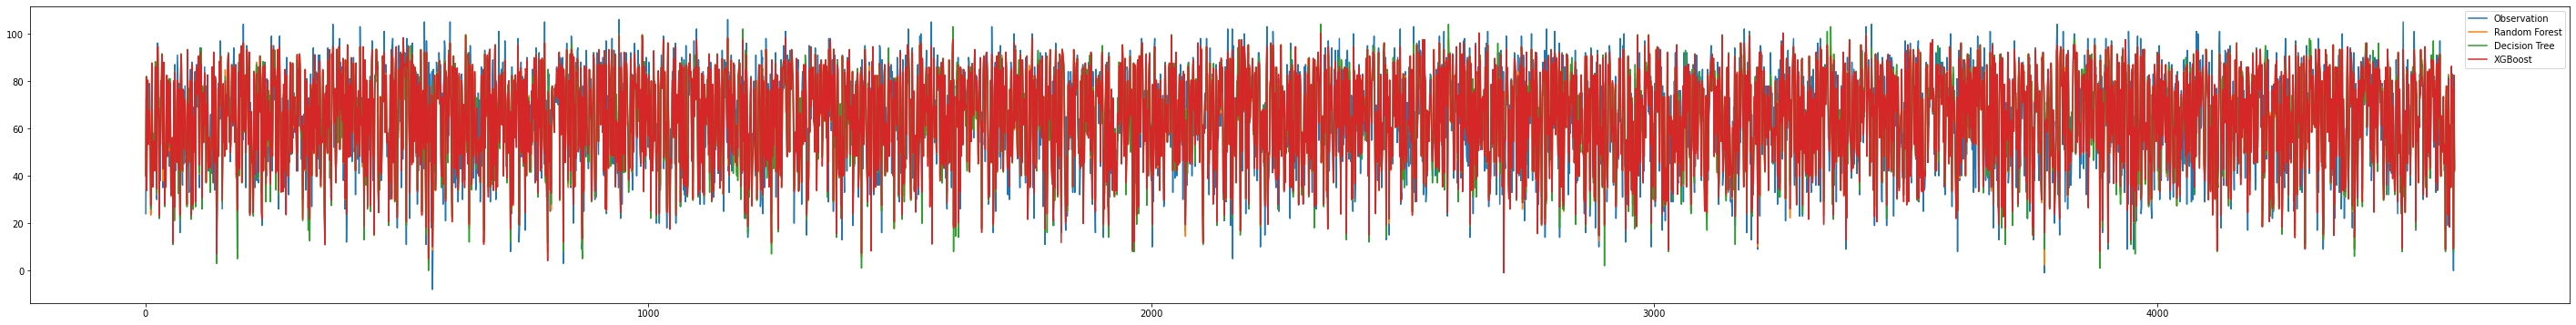

In [27]:
plt.figure(figsize=(50,6))
plt.plot(np.arange(1,4592),test_y,label = "Observation")
plt.plot(np.arange(1,4592),prediction,label = "Random Forest")
plt.plot(np.arange(1,4592),prediction2,label = "Decision Tree")
plt.plot(np.arange(1,4592),prediction3,label = "XGBoost")
plt.legend()

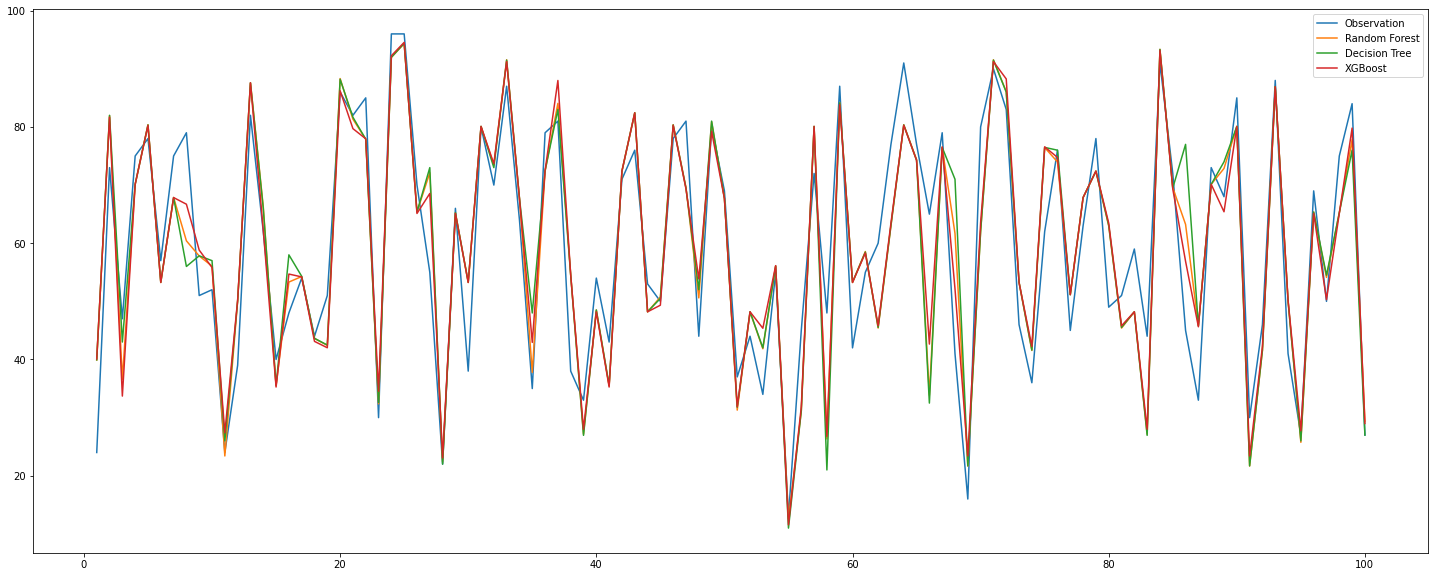

In [28]:
F1=test_y[0:100]
F2=prediction[0:100]
F3=prediction2[0:100]
F4=prediction3[0:100]
plt.figure(figsize=(25,10))
plt.plot(np.arange(1,101),F1,label = "Observation")
plt.plot(np.arange(1,101),F2,label = "Random Forest")
plt.plot(np.arange(1,101),F3,label = "Decision Tree")
plt.plot(np.arange(1,101),F4,label = "XGBoost")
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc77205fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc772155b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc77205d00>,
 'medians': [<matplotlib.lines.Line2D at 0x1dc77215b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dc77215e20>,
 'means': []}

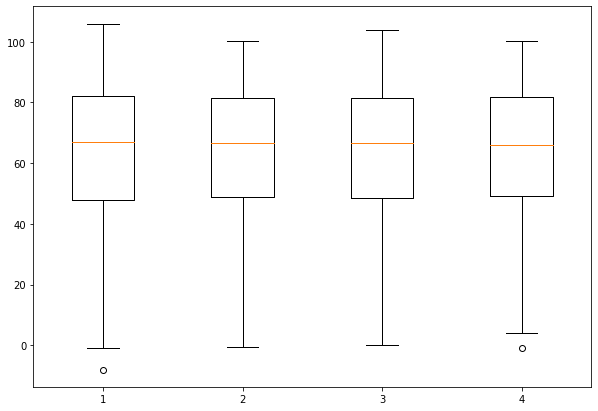

In [29]:
data = [test_y, prediction, prediction2, prediction3]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)